In [1]:
!pip install scipy
!pip install matplotlib
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.8 MB/s eta 0:00:00a 0:00:01


In [2]:
from data_handling.data_loader import load_data
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [18]:
df = load_data('data/hourly/country_wide_aggregated.csv', num_rows=1000).iloc()[-1000:]
df

,Wind Power [MW] (Net control),Estimated Wind Power [MW] (current),Temperature [°C],Wind Speed [m/s]
Time,,,,
2021-01-01 01:00:00,48.750,50.689,1.463303,1.981481
2021-01-01 02:00:00,40.008,43.884,1.289908,2.075926
2021-01-01 03:00:00,25.936,34.798,1.040367,1.993519
2021-01-01 04:00:00,17.075,28.185,0.750459,1.930556
2021-01-01 05:00:00,20.959,23.733,0.454128,1.962963
...,...,...,...,...
2021-02-11 12:00:00,290.597,303.880,-4.064220,7.632407
2021-02-11 13:00:00,295.860,303.212,-4.095413,7.390741
2021-02-11 14:00:00,294.085,302.650,-4.272477,7.333333


In [4]:
df.columns

Index(['Wind Power [MW] (Net control)', 'Estimated Wind Power [MW] (current)',
       'Temperature [°C]', 'Wind Speed [m/s]'],
      dtype='object')

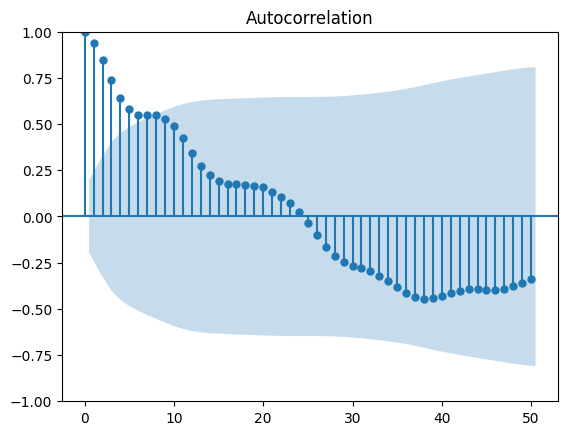

In [5]:
power = df['Wind Power [MW] (Net control)'].values[:100]

plot_acf(power, lags=50);

# TODO: autocorrelate decomposed data

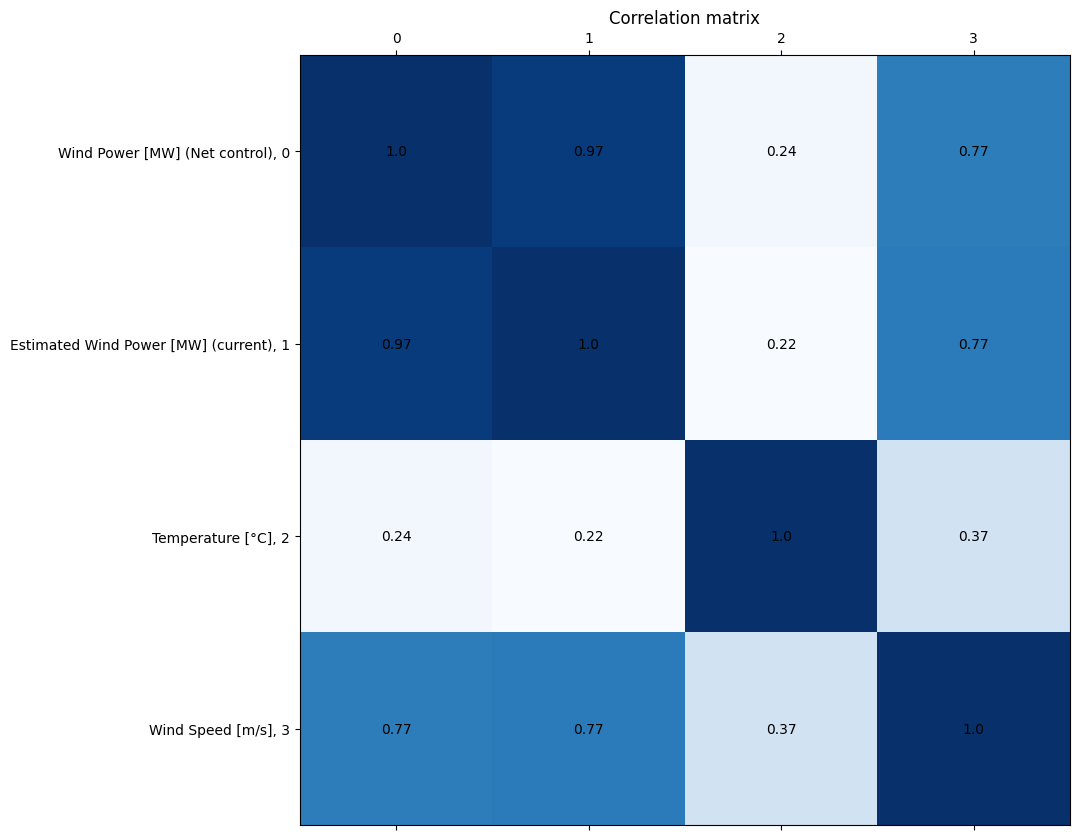

In [19]:
corr = df.corr().to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))

ax.matshow(corr, cmap=plt.cm.Blues)

for i in range(corr.shape[0]):
    for j in range(corr.shape[0]):
        c = corr[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center')

ax.set_yticks(np.arange(corr.shape[0]))
ax.set_xticks(np.arange(corr.shape[0]))
ax.set_yticklabels([f'{label}, {idx}' for idx, label in enumerate(df.columns)])
ax.set_xticklabels([i for i in range(len(df.columns))])

ax.set_title('Correlation matrix')
plt.show()

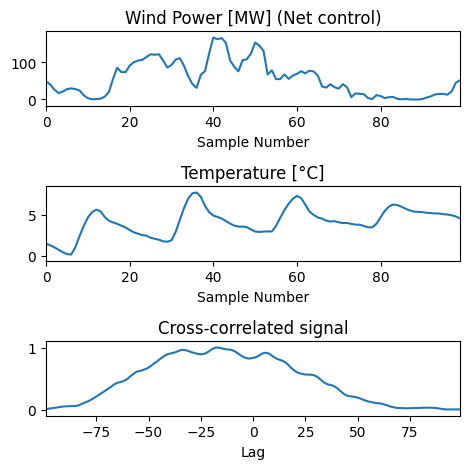

In [8]:
col = 'Temperature [°C]'


sig_len = 100
target = df['Wind Power [MW] (Net control)'].values[:sig_len]
param = df[col].values[:sig_len]

corr = sp.signal.correlate(target, param)
lags = sp.signal.correlation_lags(sig_len, sig_len)
corr /= np.max(corr)

fig, (ax_target, ax_param, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_target.plot(target)
ax_target.set_title('Wind Power [MW] (Net control)')
ax_target.set_xlabel('Sample Number')
ax_param.plot(param)
ax_param.set_title(col)
ax_param.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_target.margins(0, 0.1)
ax_param.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['Wind Power [MW] (Net control)', 'Temperature [°C]']], maxlag=[24]);



Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.8800  , p=0.0065  , df_denom=927, df_num=24
ssr based chi2 test:   chi2=47.5049 , p=0.0029  , df=24
likelihood ratio test: chi2=46.3850 , p=0.0040  , df=24
parameter F test:         F=1.8800  , p=0.0065  , df_denom=927, df_num=24
